# AES

Guessing entropy - different datasets

## Imports

In [1]:
import h5py
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.optimizers import Adam
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras import Sequential
from keras.layers import Flatten, Dense, Input, Conv1D, BatchNormalization, MaxPool1D, AveragePooling1D, Dropout

## Constants

In [2]:
AES_Sbox = np.array(
    [0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
     0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
     0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
     0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
     0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
     0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
     0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
     0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
     0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
     0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
     0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
     0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
     0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
     0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
     0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
     0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
     ])

In [3]:
AES_Sbox_inv = np.array(
    [0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
     0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
     0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
     0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
     0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
     0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
     0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
     0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
     0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
     0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
     0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
     0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
     0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
     0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
     0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
     0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
     ])

In [4]:
classes = 256

In [5]:
def create_data(n, plaintext, key):
    data = np.zeros((n, 48))
    for i in range(n):
        data[i][0:16] = plaintext[i]
        data[i][32:48] = key[i]

    return data

## Metrics

In [6]:
def guessing_entropy(model, x, good_key, key_label_guess, runs):
    n_traces = len(x)
    key_ranking_sum = np.zeros(n_traces)

    output = model.predict(x)

    n_guesses = len(key_label_guess)
    p_key_guess_traces = np.zeros((n_traces, n_guesses))
    for index in range(n_traces):
        kl = np.asarray([int(leakage[index]) for leakage in key_label_guess[:]])
        p_key_guess_traces[index] = output[index][kl]

    for run in range(runs):
        p_key_guess_all_traces_shuffled = shuffle(p_key_guess_traces, random_state=random.randint(0, 100000))

        key_probabilities = np.zeros(n_guesses)

        for index in range(n_traces):
            key_probabilities += np.log(p_key_guess_all_traces_shuffled[index] + 1e-36)
            key_probabilities_sorted = np.argsort(key_probabilities)[::-1]

            key_ranking_good_key = list(key_probabilities_sorted).index(good_key) + 1
            key_ranking_sum[index] += key_ranking_good_key

    guessing_entropy = key_ranking_sum / runs
    result_number_of_traces_ge_1 = n_traces

    if guessing_entropy[n_traces - 1] < 2:
        result_number_of_traces_ge_1 -= np.argmax(guessing_entropy[::-1] > 2)

    print(f"GE = {guessing_entropy[n_traces - 1]}")
    if guessing_entropy[n_traces - 1] < 2:
        print(f"Number of traces to reach GE = 1: {result_number_of_traces_ge_1}")

    return guessing_entropy

## ASCAD

$$ Y(k^*) = Sbox[P_i \oplus k^*] $$

### Dataset

In [7]:
dataset_file = "./datasets/ASCAD.h5"
key = "4DFBE0F27221FE10A78D4ADC8E490469"
in_dim = 700
n_profiling = 50000
n_attack = 10000
good_key = 224
target_byte = 2

In [8]:
def aes_labelize_ascad(trace_data, byte, key_byte):
    text_values = np.array([row[byte] for row in trace_data])
    state = [int(x) ^ int(k) for x, k in zip(text_values, key_byte)]

    return AES_Sbox[state]

In [9]:
def get_key_guess_labels(trace_data, key, byte):
    n = len(trace_data)
    key_guess_labels = np.zeros((256, n))
    for key_byte_hypothesis in range(0, 256):
        key_h = bytearray.fromhex(key)
        key_h[byte] = key_byte_hypothesis
        key_byte = np.full(n, key_h[byte])
        key_guess_labels[key_byte_hypothesis][:] = aes_labelize_ascad(trace_data, byte, key_byte)

    return key_guess_labels

#### Loading the dataset

In [10]:
file = h5py.File(dataset_file, "r")

profiling_traces = file['Profiling_traces']
attack_traces = file['Attack_traces']

profiling_samples = np.array(profiling_traces['traces'], dtype=np.float64)
profiling_plaintext = profiling_traces['metadata']['plaintext']
profiling_key = profiling_traces['metadata']['key']
profiling_data = create_data(n_profiling, profiling_plaintext, profiling_key)

attack_samples = np.array(attack_traces['traces'], dtype=np.float64)
attack_plaintext = attack_traces['metadata']['plaintext']
attack_key = attack_traces['metadata']['key']
attack_data = create_data(n_attack, attack_plaintext, attack_key)

In [11]:
X_profiling = profiling_samples
key_byte = np.array([i[target_byte + 32] for i in profiling_data])
Y_profiling = aes_labelize_ascad(profiling_data, target_byte, key_byte)

X_attack = attack_samples
key_byte = np.array([i[target_byte + 32] for i in attack_data])
Y_attack = aes_labelize_ascad(attack_data, target_byte, key_byte)

X_validation = X_attack[0: int(n_attack / 2)]
Y_validation = Y_attack[0: int(n_attack / 2)]
validation_data = attack_data[0: int(n_attack / 2)]

X_attack = X_attack[int(n_attack / 2): n_attack]
Y_attack = Y_attack[int(n_attack / 2): n_attack]
attack_data = attack_data[int(n_attack / 2): n_attack]

#### Scaling

In [12]:
scaler = StandardScaler()
scaler.fit(X_profiling)

X_profiling = scaler.transform(X_profiling)
X_validation = scaler.transform(X_validation)
X_attack = scaler.transform(X_attack)

scaler = MinMaxScaler()
scaler.fit(X_profiling)

X_profiling = scaler.transform(X_profiling)
X_validation = scaler.transform(X_validation)
X_attack = scaler.transform(X_attack)

Y_profiling = to_categorical(Y_profiling, num_classes=classes)
Y_validation = to_categorical(Y_validation, num_classes=classes)
Y_attack = to_categorical(Y_attack, num_classes=classes)

X_profiling = X_profiling.astype('float32')
X_validation = X_validation.astype('float32')
X_attack = X_attack.astype('float32')

### Models

In [13]:
key_label_guess_valid = get_key_guess_labels(validation_data, key, target_byte)
key_label_guess_attack = get_key_guess_labels(attack_data, key, target_byte)

#### CNN

##### CNN paper [Make some noise](https://tches.iacr.org/index.php/TCHES/article/view/8292/7642)

In [14]:
def cnn_architecture(input_size, learning_rate, classes=classes):
    input_shape = (input_size, 1)
    input = Input(shape=input_shape)

    x = BatchNormalization()(input)
    x = Conv1D(8, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(16, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(32, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(64, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(128, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(128, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(256, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(256, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Flatten()(x)

    x = Dense(256, kernel_initializer='he_uniform', activation='relu')(x)
    x = Dropout(0.5)(x)

    x = Dense(classes, activation='softmax')(x)

    model = Model(input, x, name='ascad_model')
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [15]:
epochs = 50
mini_batch = 256
learning_rate = 0.0001

In [19]:
model = cnn_architecture(in_dim, learning_rate)

model.fit(
    x=X_profiling,
    y=Y_profiling,
    batch_size=mini_batch,
    verbose=1,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_validation, Y_validation),
    callbacks=[])

Epoch 1/50
196/196 [==============================] - 33s 157ms/step - loss: 6.3057 - accuracy: 0.0040 - val_loss: 5.8005 - val_accuracy: 0.0038
Epoch 2/50
196/196 [==============================] - 39s 199ms/step - loss: 5.7708 - accuracy: 0.0050 - val_loss: 5.6698 - val_accuracy: 0.0022
Epoch 3/50
196/196 [==============================] - 42s 214ms/step - loss: 5.6325 - accuracy: 0.0051 - val_loss: 5.6068 - val_accuracy: 0.0040
Epoch 4/50
196/196 [==============================] - 43s 219ms/step - loss: 5.5736 - accuracy: 0.0057 - val_loss: 5.5906 - val_accuracy: 0.0036
Epoch 5/50
196/196 [==============================] - 45s 227ms/step - loss: 5.5454 - accuracy: 0.0061 - val_loss: 5.5827 - val_accuracy: 0.0038
Epoch 6/50
196/196 [==============================] - 43s 217ms/step - loss: 5.5247 - accuracy: 0.0078 - val_loss: 5.5807 - val_accuracy: 0.0030
Epoch 7/50
196/196 [==============================] - 39s 198ms/step - loss: 5.5078 - accuracy: 0.0080 - val_loss: 5.5821 - val_ac

In [20]:
ge_validation = guessing_entropy(model, X_validation, good_key, key_label_guess_valid, 100)
ge_attack = guessing_entropy(model, X_attack, good_key, key_label_guess_attack, 100)

157/157 [==============================] - 4s 11ms/step
GE = 178.0
157/157 [==============================] - 2s 9ms/step
GE = 70.0


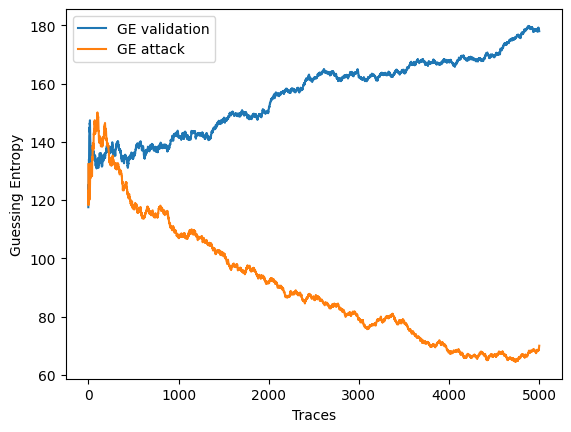

In [21]:
plt.plot(ge_validation, label="GE validation")
plt.plot(ge_attack, label="GE attack")
plt.xlabel("Traces")
plt.ylabel("Guessing Entropy")
plt.legend()
plt.show()

##### CNN paper [Methodology for Efficient CNN Architectures in Profiling Attacks](https://tches.iacr.org/index.php/TCHES/article/view/8391)

In [24]:
def cnn_architecture(input_size=700, learning_rate=0.00001, classes=256):
    input_shape = (input_size, 1)
    input = Input(shape=input_shape)

    x = Conv1D(4, 2, kernel_initializer='he_uniform', activation='selu', padding='same')(input)
    x = BatchNormalization()(x)
    x = AveragePooling1D(2, strides=2)(x)
    x = Flatten(name='flatten')(x)
    x = Dense(10, kernel_initializer='he_uniform', activation='selu', name='fc1')(x)
    x = Dense(10, kernel_initializer='he_uniform', activation='selu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    inputs = input
    model = Model(inputs, x, name='ascad')
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [25]:
epochs = 50
mini_batch = 100
learning_rate = 1e-3

In [26]:
model = cnn_architecture(in_dim, learning_rate)

model.fit(
    x=X_profiling,
    y=Y_profiling,
    batch_size=mini_batch,
    verbose=1,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_validation, Y_validation),
    callbacks=[])

Epoch 1/50
500/500 [==============================] - 9s 17ms/step - loss: 5.5711 - accuracy: 0.0039 - val_loss: 5.5540 - val_accuracy: 0.0050
Epoch 2/50
500/500 [==============================] - 8s 16ms/step - loss: 5.5494 - accuracy: 0.0044 - val_loss: 5.5533 - val_accuracy: 0.0028
Epoch 3/50
500/500 [==============================] - 8s 17ms/step - loss: 5.5423 - accuracy: 0.0050 - val_loss: 5.5564 - val_accuracy: 0.0020
Epoch 4/50
500/500 [==============================] - 8s 16ms/step - loss: 5.5397 - accuracy: 0.0050 - val_loss: 5.5582 - val_accuracy: 0.0048
Epoch 5/50
500/500 [==============================] - 8s 16ms/step - loss: 5.5379 - accuracy: 0.0054 - val_loss: 5.5579 - val_accuracy: 0.0044
Epoch 6/50
500/500 [==============================] - 8s 16ms/step - loss: 5.5347 - accuracy: 0.0056 - val_loss: 5.5818 - val_accuracy: 0.0036
Epoch 7/50
500/500 [==============================] - 8s 16ms/step - loss: 5.5329 - accuracy: 0.0056 - val_loss: 5.5716 - val_accuracy: 0.0060

In [27]:
ge_validation = guessing_entropy(model, X_validation, good_key, key_label_guess_valid, 100)
ge_attack = guessing_entropy(model, X_attack, good_key, key_label_guess_attack, 100)

157/157 [==============================] - 1s 4ms/step
GE = 1.0
Number of traces to reach GE = 1: 126
157/157 [==============================] - 1s 3ms/step
GE = 1.0
Number of traces to reach GE = 1: 142


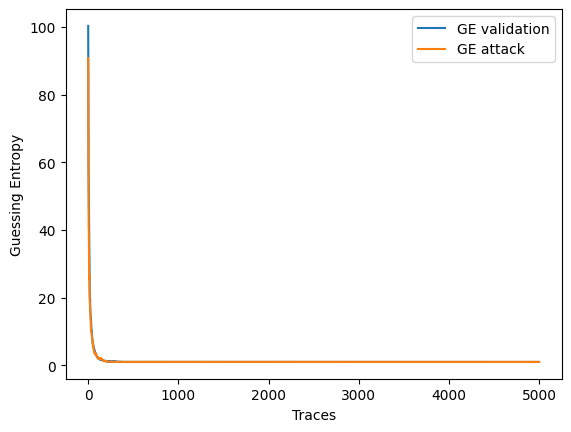

In [28]:
plt.plot(ge_validation, label="GE validation")
plt.plot(ge_attack, label="GE attack")
plt.xlabel("Traces")
plt.ylabel("Guessing Entropy")
plt.legend()
plt.show()

#### MLP


In [14]:
def mlp_architecture(classes, number_of_samples, learning_rate):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(number_of_samples,)))
    for l_i in range(5):
        model.add(Dense(600, activation='relu', kernel_initializer='he_uniform', bias_initializer='zeros'))
    model.add(Dense(classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [15]:
epochs = 50
mini_batch = 100
learning_rate = 0.0001

In [16]:
model = mlp_architecture(classes, in_dim, learning_rate)
model.fit(
    x=X_profiling,
    y=Y_profiling,
    batch_size=mini_batch,
    verbose=1,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_validation, Y_validation),
    callbacks=[])

Epoch 1/50
500/500 [==============================] - 19s 32ms/step - loss: 5.5836 - accuracy: 0.0042 - val_loss: 5.5555 - val_accuracy: 0.0044
Epoch 2/50
500/500 [==============================] - 15s 31ms/step - loss: 5.5364 - accuracy: 0.0060 - val_loss: 5.5642 - val_accuracy: 0.0036
Epoch 3/50
500/500 [==============================] - 17s 35ms/step - loss: 5.5177 - accuracy: 0.0067 - val_loss: 5.5664 - val_accuracy: 0.0044
Epoch 4/50
500/500 [==============================] - 17s 34ms/step - loss: 5.4869 - accuracy: 0.0104 - val_loss: 5.5773 - val_accuracy: 0.0054
Epoch 5/50
500/500 [==============================] - 16s 32ms/step - loss: 5.4288 - accuracy: 0.0136 - val_loss: 5.5799 - val_accuracy: 0.0070
Epoch 6/50
500/500 [==============================] - 16s 32ms/step - loss: 5.3389 - accuracy: 0.0190 - val_loss: 5.5785 - val_accuracy: 0.0086
Epoch 7/50
500/500 [==============================] - 15s 30ms/step - loss: 5.2214 - accuracy: 0.0274 - val_loss: 5.6100 - val_accuracy:

In [17]:
ge_validation = guessing_entropy(model, X_validation, good_key, key_label_guess_valid, 100)
ge_attack = guessing_entropy(model, X_attack, good_key, key_label_guess_attack, 100)

157/157 [==============================] - 1s 8ms/step
GE = 1.0
Number of traces to reach GE = 1: 1190
157/157 [==============================] - 1s 6ms/step
GE = 1.0
Number of traces to reach GE = 1: 1460


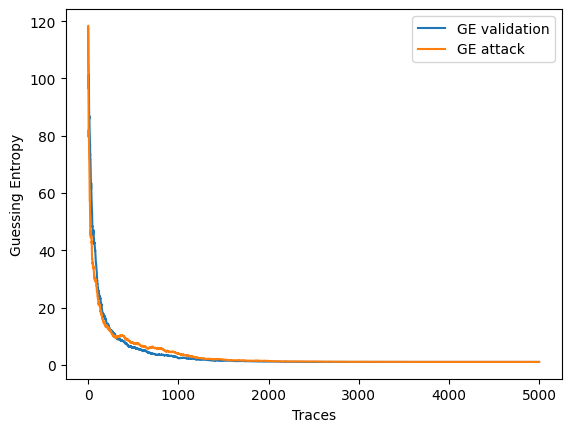

In [18]:
plt.plot(ge_validation, label="GE validation")
plt.plot(ge_attack, label="GE attack")
plt.xlabel("Traces")
plt.ylabel("Guessing Entropy")
plt.legend()
plt.show()

## AES_HD

$$Y(k^*) = Sbox^{-1}[C_i \oplus k^*] \oplus C_j $$

### Dataset

In [7]:
dataset_file = "./datasets/aes_hd.h5"
key = "2b7e151628aed2a6abf7158809cf4f3c"
in_dim = 1250
n_profiling = 45000
n_attack = 5000
good_key = 136
target_byte = 11

In [8]:
def aes_labelize_hd(trace_data, byte, key_byte):
    ciphertext_values_i = np.array([row[byte] for row in trace_data])
    ciphertext_values_j = np.array([row[byte - 4] for row in trace_data])
    state = [int(x) ^ int(k) for x, k in zip(ciphertext_values_i, key_byte)]
    values = AES_Sbox_inv[state]
    ret = [int(x) ^ int(v) for x, v in zip(ciphertext_values_j, values)]
    return ret


In [9]:
def get_key_guess_labels(trace_data, key, byte):
    n = len(trace_data)
    key_guess_labels = np.zeros((256, n))
    for key_byte_hypothesis in range(0, 256):
        key_h = bytearray.fromhex(key)
        key_h[byte] = key_byte_hypothesis
        key_byte = np.full(n, key_h[byte])
        key_guess_labels[key_byte_hypothesis][:] = aes_labelize_hd(trace_data, target_byte, key_byte)

    return key_guess_labels

#### Loading the dataset

In [10]:
file = h5py.File(dataset_file, "r")

profiling_traces = file['Profiling_traces']
attack_traces = file['Attack_traces']

profiling_samples = np.array(profiling_traces['traces'], dtype=np.float64)
profiling_plaintext = profiling_traces['metadata']['plaintext']
profiling_key = profiling_traces['metadata']['key']
profiling_data = create_data(n_profiling, profiling_plaintext, profiling_key)

attack_samples = np.array(attack_traces['traces'], dtype=np.float64)
attack_plaintext = attack_traces['metadata']['plaintext']
attack_key = attack_traces['metadata']['key']
attack_data = create_data(n_attack, attack_plaintext, attack_key)

In [11]:
X_profiling = profiling_samples
key_byte = np.array([i[target_byte + 32] for i in profiling_data])
Y_profiling = aes_labelize_hd(profiling_data, target_byte, key_byte)

X_attack = attack_samples
key_byte = np.array([i[target_byte + 32] for i in attack_data])
Y_attack = aes_labelize_hd(attack_data, target_byte, key_byte)

X_validation = X_attack[0: int(n_attack / 2)]
Y_validation = Y_attack[0: int(n_attack / 2)]
validation_data = attack_data[0: int(n_attack / 2)]

X_attack = X_attack[int(n_attack / 2): n_attack]
Y_attack = Y_attack[int(n_attack / 2): n_attack]
attack_data = attack_data[int(n_attack / 2): n_attack]

#### Scaling

In [12]:
scaler = StandardScaler()
scaler.fit(X_profiling)

X_profiling = scaler.transform(X_profiling)
X_validation = scaler.transform(X_validation)
X_attack = scaler.transform(X_attack)

scaler = MinMaxScaler()
scaler.fit(X_profiling)

X_profiling = scaler.transform(X_profiling)
X_validation = scaler.transform(X_validation)
X_attack = scaler.transform(X_attack)

Y_profiling = to_categorical(Y_profiling, num_classes=classes)
Y_validation = to_categorical(Y_validation, num_classes=classes)
Y_attack = to_categorical(Y_attack, num_classes=classes)

X_profiling = X_profiling.astype('float32')
X_validation = X_validation.astype('float32')
X_attack = X_attack.astype('float32')

### Models

In [13]:
key_label_guess_valid = get_key_guess_labels(validation_data, key, target_byte)
key_label_guess_attack = get_key_guess_labels(attack_data, key, target_byte)

#### CNN

##### CNN paper [Methodology for Efficient CNN Architectures in Profiling Attacks](https://tches.iacr.org/index.php/TCHES/article/view/8391)

In [29]:
def cnn_architecture(input_size=1250, learning_rate=0.00001, classes=256):
    input_shape = (input_size, 1)
    input = Input(shape=input_shape)

    x = Conv1D(2, 2, kernel_initializer='he_uniform', activation='selu', padding='same')(input)
    x = BatchNormalization()(x)
    x = AveragePooling1D(2, strides=2)(x)
    x = Flatten()(x)
    x = Dense(2, kernel_initializer='he_uniform', activation='selu')(x)
    x = Dense(classes, activation='softmax')(x)

    inputs = input
    model = Model(inputs, x)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [30]:
epochs = 50
mini_batch = 256
learning_rate = 1e-4

In [ ]:
model = cnn_architecture(in_dim, learning_rate)

model.fit(
    x=X_profiling,
    y=Y_profiling,
    batch_size=mini_batch,
    verbose=1,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_validation, Y_validation),
    callbacks=[])

Epoch 1/50
176/176 [==============================] - 13s 61ms/step - loss: 5.5520 - accuracy: 0.0042 - val_loss: 5.5473 - val_accuracy: 0.0036
Epoch 2/50
176/176 [==============================] - 9s 51ms/step - loss: 5.5492 - accuracy: 0.0042 - val_loss: 5.5493 - val_accuracy: 0.0036
Epoch 3/50
176/176 [==============================] - 9s 49ms/step - loss: 5.5475 - accuracy: 0.0043 - val_loss: 5.5506 - val_accuracy: 0.0040
Epoch 4/50
176/176 [==============================] - 9s 51ms/step - loss: 5.5462 - accuracy: 0.0044 - val_loss: 5.5513 - val_accuracy: 0.0044
Epoch 5/50
176/176 [==============================] - 9s 49ms/step - loss: 5.5452 - accuracy: 0.0042 - val_loss: 5.5515 - val_accuracy: 0.0044
Epoch 6/50
176/176 [==============================] - 8s 48ms/step - loss: 5.5444 - accuracy: 0.0049 - val_loss: 5.5513 - val_accuracy: 0.0044
Epoch 7/50
176/176 [==============================] - 8s 47ms/step - loss: 5.5437 - accuracy: 0.0052 - val_loss: 5.5507 - val_accuracy: 0.004

In [ ]:
ge_validation = guessing_entropy(model, X_validation, good_key, key_label_guess_valid, 100)
ge_attack = guessing_entropy(model, X_attack, good_key, key_label_guess_attack, 100)

In [ ]:
plt.plot(ge_validation, label="GE validation")
plt.plot(ge_attack, label="GE attack")
plt.xlabel("Traces")
plt.ylabel("Guessing Entropy")
plt.legend()
plt.show()

##### CNN paper [Make some noise](https://tches.iacr.org/index.php/TCHES/article/view/8292/7642)

In [24]:
def cnn_architecture(input_size, learning_rate, classes=classes):
    input_shape = (input_size, 1)
    input = Input(shape=input_shape)

    x = BatchNormalization()(input)
    x = Conv1D(8, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(16, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(32, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(64, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(128, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(128, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(256, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Conv1D(256, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = MaxPool1D(2, strides=2)(x)

    x = Flatten()(x)

    x = Dense(512, kernel_initializer='he_uniform', activation='relu')(x)
    x = Dropout(0.5)(x)

    x = Dense(classes, activation='softmax')(x)

    model = Model(input, x, name='ascad_model')
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [25]:
epochs = 50
mini_batch = 256
learning_rate = 0.0001

In [26]:
model = cnn_architecture(in_dim, learning_rate)

model.fit(
    x=X_profiling,
    y=Y_profiling,
    batch_size=mini_batch,
    verbose=1,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_validation, Y_validation),
    callbacks=[])

Epoch 1/50
176/176 [==============================] - 79s 416ms/step - loss: 6.3140 - accuracy: 0.0035 - val_loss: 6.0007 - val_accuracy: 0.0036
Epoch 2/50
176/176 [==============================] - 64s 364ms/step - loss: 5.6750 - accuracy: 0.0050 - val_loss: 5.7108 - val_accuracy: 0.0040
Epoch 3/50
176/176 [==============================] - 65s 371ms/step - loss: 5.5698 - accuracy: 0.0064 - val_loss: 5.6210 - val_accuracy: 0.0032
Epoch 4/50
176/176 [==============================] - 65s 368ms/step - loss: 5.5211 - accuracy: 0.0080 - val_loss: 5.5884 - val_accuracy: 0.0032
Epoch 5/50
176/176 [==============================] - 65s 368ms/step - loss: 5.4889 - accuracy: 0.0104 - val_loss: 5.5856 - val_accuracy: 0.0052
Epoch 6/50
176/176 [==============================] - 82s 466ms/step - loss: 5.4517 - accuracy: 0.0129 - val_loss: 5.5908 - val_accuracy: 0.0032
Epoch 7/50
176/176 [==============================] - 109s 617ms/step - loss: 5.4134 - accuracy: 0.0153 - val_loss: 5.5913 - val_a

In [27]:
ge_validation = guessing_entropy(model, X_validation, good_key, key_label_guess_valid, 100)
ge_attack = guessing_entropy(model, X_attack, good_key, key_label_guess_attack, 100)

79/79 [==============================] - 2s 17ms/step
GE = 73.0
79/79 [==============================] - 1s 15ms/step
GE = 143.0


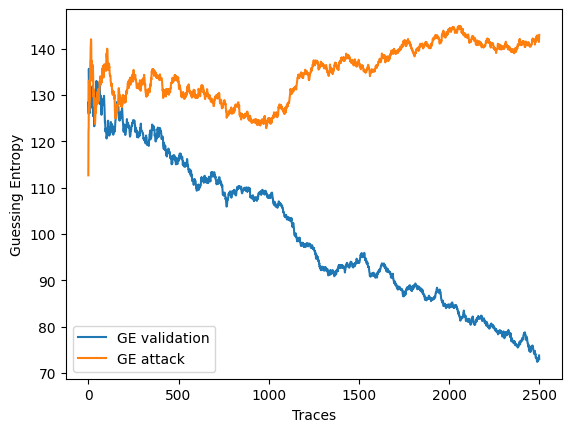

In [28]:
plt.plot(ge_validation, label="GE validation")
plt.plot(ge_attack, label="GE attack")
plt.xlabel("Traces")
plt.ylabel("Guessing Entropy")
plt.legend()
plt.show()

#### MLP

In [19]:
def mlp_architecture(classes, number_of_samples, learning_rate):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(number_of_samples,)))
    for l_i in range(5):
        model.add(Dense(600, activation='relu', kernel_initializer='he_uniform', bias_initializer='zeros'))
    model.add(Dense(classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [20]:
epochs = 50
mini_batch = 100
learning_rate = 0.0001

In [21]:
model = mlp_architecture(classes, in_dim, learning_rate)
model.fit(
    x=X_profiling,
    y=Y_profiling,
    batch_size=mini_batch,
    verbose=1,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_validation, Y_validation),
    callbacks=[])

Epoch 1/50
450/450 [==============================] - 20s 39ms/step - loss: 5.5936 - accuracy: 0.0046 - val_loss: 5.5570 - val_accuracy: 0.0048
Epoch 2/50
450/450 [==============================] - 17s 38ms/step - loss: 5.4891 - accuracy: 0.0102 - val_loss: 5.5874 - val_accuracy: 0.0060
Epoch 3/50
450/450 [==============================] - 18s 41ms/step - loss: 5.3876 - accuracy: 0.0201 - val_loss: 5.6384 - val_accuracy: 0.0056
Epoch 4/50
450/450 [==============================] - 18s 41ms/step - loss: 5.2153 - accuracy: 0.0339 - val_loss: 5.7394 - val_accuracy: 0.0056
Epoch 5/50
450/450 [==============================] - 16s 36ms/step - loss: 4.9676 - accuracy: 0.0573 - val_loss: 5.8550 - val_accuracy: 0.0040
Epoch 6/50
450/450 [==============================] - 16s 35ms/step - loss: 4.6666 - accuracy: 0.0928 - val_loss: 6.0302 - val_accuracy: 0.0040
Epoch 7/50
450/450 [==============================] - 15s 34ms/step - loss: 4.3302 - accuracy: 0.1412 - val_loss: 6.2227 - val_accuracy:

In [22]:
ge_validation = guessing_entropy(model, X_validation, good_key, key_label_guess_valid, 100)
ge_attack = guessing_entropy(model, X_attack, good_key, key_label_guess_attack, 100)

79/79 [==============================] - 1s 9ms/step
GE = 47.0
79/79 [==============================] - 1s 7ms/step
GE = 75.0


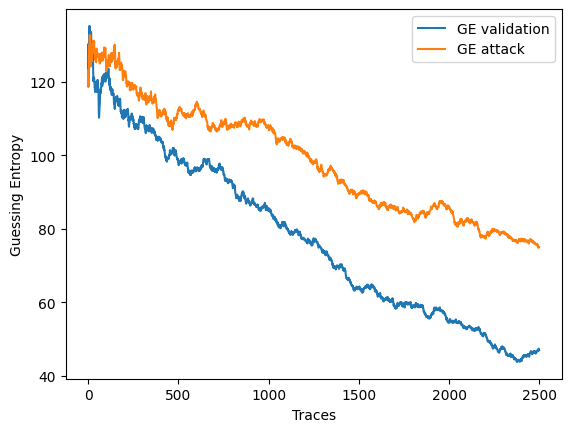

In [23]:
plt.plot(ge_validation, label="GE validation")
plt.plot(ge_attack, label="GE attack")
plt.xlabel("Traces")
plt.ylabel("Guessing Entropy")
plt.legend()
plt.show()

## DPAv4

$$ Y(k^*) = Sbox[P_i \oplus k^*] \oplus M $$

### Dataset

In [10]:
key = "8249ceb658c71d41d7b734449629ab97"
dataset_file = './datasets/dpa_v4.h5'
key_offset = 32
in_dim = 4000
n_profiling = 4500
n_attack = 500
good_key = 130
target_byte = 0

In [11]:
def aes_labelize_dpa(trace_data, byte, key_byte, mask, offset):
    text_values = np.array([row[byte] for row in trace_data])
    state = np.array([int(x) ^ int(k) for x, k in zip(text_values, key_byte)])
    values = AES_Sbox[state]
    mask_off = np.array([mask[int(oi[byte] + 1) % 16] for oi in offset])
    ret = np.array([int(x) ^ int(m) for x, m in zip(values, mask_off)])
    return ret


In [12]:
def get_key_guess_labels(trace_data, key, byte, mask, offset):
    n = len(trace_data)
    key_guess_labels = np.zeros((256, n))
    for key_byte_hypothesis in range(0, 256):
        key_h = bytearray.fromhex(key)
        key_h[byte] = key_byte_hypothesis
        key_byte = np.full(n, key_h[byte])
        key_guess_labels[key_byte_hypothesis][:] = aes_labelize_dpa(trace_data, byte, key_byte, mask, offset)

    return key_guess_labels

#### Loading the dataset

In [13]:
file = h5py.File(dataset_file, "r")

profiling_traces = file['Profiling_traces']
attack_traces = file['Attack_traces']

profiling_samples = np.array(profiling_traces['traces'], dtype=np.float64)
profiling_labels = np.array(profiling_traces['labels'], dtype=np.float64)
profiling_plaintext = profiling_traces['metadata']['plaintext']
profiling_key = profiling_traces['metadata']['key']
profiling_data = create_data(n_profiling, profiling_plaintext, profiling_key)

attack_samples = np.array(attack_traces['traces'], dtype=np.float64)
attack_labels = np.array(attack_traces['labels'], dtype=np.float64)
attack_plaintext = attack_traces['metadata']['plaintext']
attack_key = attack_traces['metadata']['key']
attack_data = create_data(n_attack, attack_plaintext, attack_key)

mask = profiling_traces['metadata']['mask']
offset = attack_traces['metadata']['offset']

In [14]:
X_profiling = profiling_samples
key_byte = np.array([i[target_byte + 32] for i in profiling_data])
offset_profiling = np.zeros((n_profiling, 16))
Y_profiling = profiling_labels

X_attack = attack_samples
key_byte = np.array([i[target_byte + 32] for i in attack_data])
Y_attack = aes_labelize_dpa(attack_data, target_byte, key_byte, mask, offset)

X_validation = X_attack[0: int(n_attack / 2)]
Y_validation = Y_attack[0: int(n_attack / 2)]
validation_data = attack_data[0: int(n_attack / 2)]
validation_offset = offset[0: int(n_attack/2)]

X_attack = X_attack[int(n_attack / 2): n_attack]
Y_attack = Y_attack[int(n_attack / 2): n_attack]
attack_data = attack_data[int(n_attack / 2): n_attack]
attack_offset = offset[int(n_attack/2): n_attack]

#### Scaling

In [15]:
scaler = StandardScaler()
scaler.fit(X_profiling)

X_profiling = scaler.transform(X_profiling)
X_validation = scaler.transform(X_validation)
X_attack = scaler.transform(X_attack)

scaler = MinMaxScaler()
scaler.fit(X_profiling)

X_profiling = scaler.transform(X_profiling)
X_validation = scaler.transform(X_validation)
X_attack = scaler.transform(X_attack)

Y_profiling = to_categorical(Y_profiling, num_classes=classes)
Y_validation = to_categorical(Y_validation, num_classes=classes)
Y_attack = to_categorical(Y_attack, num_classes=classes)

X_profiling = X_profiling.astype('float32')
X_validation = X_validation.astype('float32')
X_attack = X_attack.astype('float32')

### Models

In [16]:
key_label_guess_valid = get_key_guess_labels(validation_data, key, target_byte, mask, validation_offset)
key_label_guess_attack = get_key_guess_labels(attack_data, key, target_byte, mask, attack_offset)

#### CNN

##### CNN paper [Methodology for Efficient CNN Architectures in Profiling Attacks](https://tches.iacr.org/index.php/TCHES/article/view/8391)

In [23]:
def cnn_architecture(input_size=4000, learning_rate=0.00001, classes=256):
    input = (input_size, 1)
    img_input = Input(shape=input)

    x = Conv1D(2, 1, kernel_initializer='he_uniform', activation='selu', padding='same')(img_input)
    x = BatchNormalization()(x)
    x = AveragePooling1D(2, strides=2)(x)
    x = Flatten()(x)
    x = Dense(2, kernel_initializer='he_uniform', activation='selu')(x)
    x = Dense(classes, activation='softmax')(x)

    inputs = img_input
    model = Model(inputs, x)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [24]:
epochs = 50
mini_batch = 50
learning_rate = 1e-3

In [25]:
model = cnn_architecture(in_dim, learning_rate)

model.fit(
    x=X_profiling,
    y=Y_profiling,
    batch_size=mini_batch,
    verbose=1,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_validation, Y_validation),
    callbacks=[])

Epoch 1/50
90/90 [==============================] - 6s 32ms/step - loss: 5.5474 - accuracy: 0.0042 - val_loss: 5.5445 - val_accuracy: 0.0000e+00
Epoch 2/50
90/90 [==============================] - 3s 29ms/step - loss: 5.4450 - accuracy: 0.0138 - val_loss: 5.4653 - val_accuracy: 0.0000e+00
Epoch 3/50
90/90 [==============================] - 3s 29ms/step - loss: 5.2488 - accuracy: 0.0160 - val_loss: 5.2873 - val_accuracy: 0.0000e+00
Epoch 4/50
90/90 [==============================] - 3s 31ms/step - loss: 5.0671 - accuracy: 0.0196 - val_loss: 5.0998 - val_accuracy: 0.0200
Epoch 5/50
90/90 [==============================] - 3s 28ms/step - loss: 4.9090 - accuracy: 0.0284 - val_loss: 4.9340 - val_accuracy: 0.0360
Epoch 6/50
90/90 [==============================] - 3s 28ms/step - loss: 4.7593 - accuracy: 0.0342 - val_loss: 4.7758 - val_accuracy: 0.0520
Epoch 7/50
90/90 [==============================] - 4s 40ms/step - loss: 4.6203 - accuracy: 0.0353 - val_loss: 4.6540 - val_accuracy: 0.0440
E

In [26]:
ge_validation = guessing_entropy(model, X_validation, good_key, key_label_guess_valid, 100)
ge_attack = guessing_entropy(model, X_attack, good_key, key_label_guess_attack, 100)

8/8 [==============================] - 0s 12ms/step
GE = 1.0
Number of traces to reach GE = 1: 3
8/8 [==============================] - 0s 10ms/step
GE = 1.0
Number of traces to reach GE = 1: 3


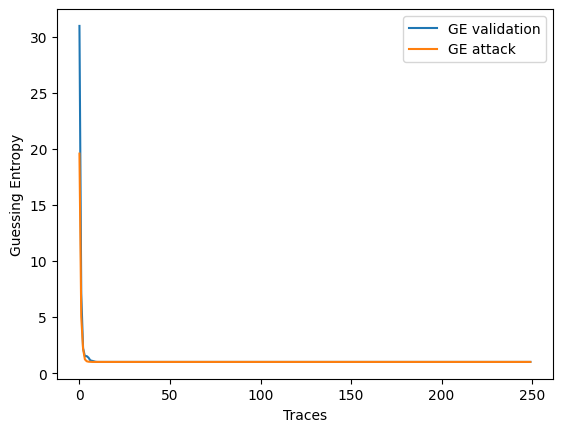

In [27]:
plt.plot(ge_validation, label="GE validation")
plt.plot(ge_attack, label="GE attack")
plt.xlabel("Traces")
plt.ylabel("Guessing Entropy")
plt.legend()
plt.show()

##### CNN paper [Make some noise](https://tches.iacr.org/index.php/TCHES/article/view/8292/7642)

In [28]:
def cnn_architecture(input_size, learning_rate, classes=classes):
    input_shape = (input_size, 1)
    input = Input(shape=input_shape)

    x = BatchNormalization()(input)
    x = Conv1D(8, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = AveragePooling1D(2, strides=2)(x)

    x = Conv1D(16, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = AveragePooling1D(2, strides=2)(x)

    x = Conv1D(32, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = AveragePooling1D(2, strides=2)(x)

    x = Conv1D(64, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = AveragePooling1D(2, strides=2)(x)

    x = Conv1D(128, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = AveragePooling1D(2, strides=2)(x)

    x = Conv1D(128, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = AveragePooling1D(2, strides=2)(x)

    x = Conv1D(128, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = AveragePooling1D(2, strides=2)(x)

    x = Conv1D(256, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = AveragePooling1D(2, strides=2)(x)

    x = Conv1D(256, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = AveragePooling1D(2, strides=2)(x)

    x = Conv1D(256, 2, kernel_initializer='he_uniform', activation='relu', padding='valid')(x)
    x = AveragePooling1D(2, strides=2)(x)

    x = Flatten()(x)

    x = Dense(4096, kernel_initializer='he_uniform', activation='relu')(x)

    x = Dense(classes, activation='softmax')(x)

    model = Model(input, x, name='ascad_model')
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [29]:
epochs = 50
mini_batch = 100
learning_rate = 0.0001

In [30]:
model = cnn_architecture(in_dim, learning_rate)

model.fit(
    x=X_profiling,
    y=Y_profiling,
    batch_size=mini_batch,
    verbose=1,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_validation, Y_validation),
    callbacks=[])

Epoch 1/50
45/45 [==============================] - 39s 771ms/step - loss: 5.8591 - accuracy: 0.0027 - val_loss: 5.5816 - val_accuracy: 0.0000e+00
Epoch 2/50
45/45 [==============================] - 17s 386ms/step - loss: 5.3759 - accuracy: 0.0160 - val_loss: 5.5867 - val_accuracy: 0.0080
Epoch 3/50
45/45 [==============================] - 17s 379ms/step - loss: 5.1455 - accuracy: 0.0331 - val_loss: 5.6461 - val_accuracy: 0.0040
Epoch 4/50
45/45 [==============================] - 17s 382ms/step - loss: 4.9269 - accuracy: 0.0587 - val_loss: 5.7284 - val_accuracy: 0.0040
Epoch 5/50
45/45 [==============================] - 25s 565ms/step - loss: 4.7094 - accuracy: 0.0851 - val_loss: 5.9871 - val_accuracy: 0.0080
Epoch 6/50
45/45 [==============================] - 29s 640ms/step - loss: 4.4994 - accuracy: 0.1142 - val_loss: 6.2421 - val_accuracy: 0.0040
Epoch 7/50
45/45 [==============================] - 29s 652ms/step - loss: 4.2574 - accuracy: 0.1669 - val_loss: 6.3233 - val_accuracy: 0.

In [31]:
ge_validation = guessing_entropy(model, X_validation, good_key, key_label_guess_valid, 100)
ge_attack = guessing_entropy(model, X_attack, good_key, key_label_guess_attack, 100)

8/8 [==============================] - 1s 63ms/step
GE = 1.0
Number of traces to reach GE = 1: 172
8/8 [==============================] - 0s 45ms/step
GE = 1.0
Number of traces to reach GE = 1: 136


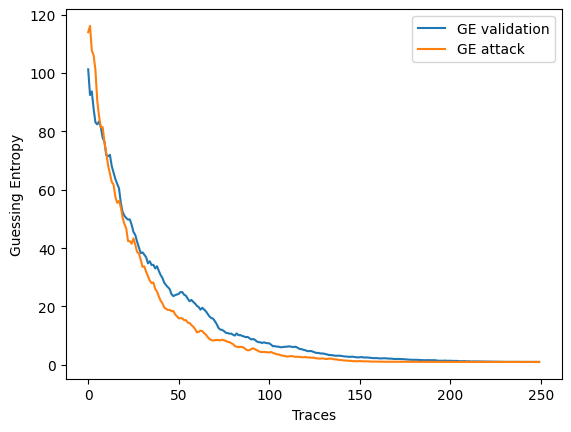

In [32]:
plt.plot(ge_validation, label="GE validation")
plt.plot(ge_attack, label="GE attack")
plt.xlabel("Traces")
plt.ylabel("Guessing Entropy")
plt.legend()
plt.show()

#### MLP

In [17]:
def mlp_architecture(classes, number_of_samples, learning_rate):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(number_of_samples,)))
    for l_i in range(3):
        model.add(Dense(600, activation='relu', kernel_initializer='he_uniform', bias_initializer='zeros'))
    model.add(Dense(classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [19]:
epochs = 20
mini_batch = 100
learning_rate = 0.001

In [20]:
model = mlp_architecture(classes, in_dim, learning_rate)
model.fit(
    x=X_profiling,
    y=Y_profiling,
    batch_size=mini_batch,
    verbose=1,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_validation, Y_validation),
    callbacks=[])

Epoch 1/20
45/45 [==============================] - 6s 46ms/step - loss: 5.9852 - accuracy: 0.0060 - val_loss: 5.5777 - val_accuracy: 0.0000e+00
Epoch 2/20
45/45 [==============================] - 2s 36ms/step - loss: 5.4043 - accuracy: 0.0156 - val_loss: 5.4627 - val_accuracy: 0.0120
Epoch 3/20
45/45 [==============================] - 2s 38ms/step - loss: 4.9091 - accuracy: 0.0287 - val_loss: 5.1390 - val_accuracy: 0.0160
Epoch 4/20
45/45 [==============================] - 2s 35ms/step - loss: 4.1601 - accuracy: 0.0816 - val_loss: 4.4660 - val_accuracy: 0.0600
Epoch 5/20
45/45 [==============================] - 2s 35ms/step - loss: 3.3264 - accuracy: 0.1764 - val_loss: 3.8225 - val_accuracy: 0.0880
Epoch 6/20
45/45 [==============================] - 2s 36ms/step - loss: 2.5868 - accuracy: 0.3147 - val_loss: 3.2078 - val_accuracy: 0.1560
Epoch 7/20
45/45 [==============================] - 2s 36ms/step - loss: 1.9373 - accuracy: 0.4436 - val_loss: 2.8730 - val_accuracy: 0.2000
Epoch 8/2

In [21]:
ge_validation = guessing_entropy(model, X_validation, good_key, key_label_guess_valid, 100)
ge_attack = guessing_entropy(model, X_attack, good_key, key_label_guess_attack, 100)

8/8 [==============================] - 0s 8ms/step
GE = 1.0
Number of traces to reach GE = 1: 1
8/8 [==============================] - 0s 9ms/step
GE = 1.0
Number of traces to reach GE = 1: 1


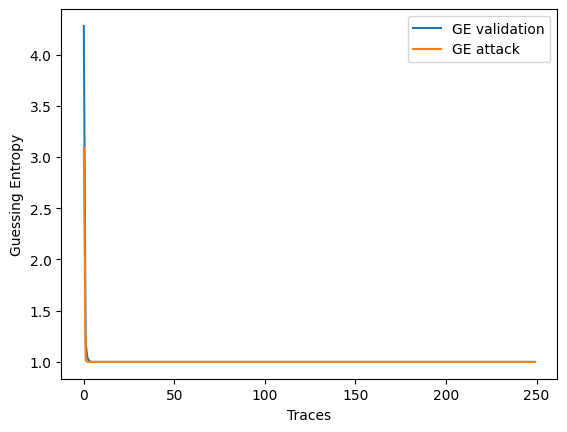

In [22]:
plt.plot(ge_validation, label="GE validation")
plt.plot(ge_attack, label="GE attack")
plt.xlabel("Traces")
plt.ylabel("Guessing Entropy")
plt.legend()
plt.show()